# K-Nearest Neighbor

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.text import Text
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy

In [6]:
#load data set
iris = datasets.load_iris()
#a) The data set gives certain lengths of flowers to what flower it is
#   The features represent the lengths of the flowers themselves
#   The target variable is trying to predict what kind of flower it is
#set x to first two features and y to target values
X = iris.data[:, :2]
y = iris.target


pd.DataFrame(X,columns=iris['feature_names'][:2]).head()


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [7]:
# we can split the data using an sklearn function which does everything for us
test_percent = 0.3 # why am I using .3 here?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percent)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((105, 2), (45, 2), (105,), (45,))

In [11]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

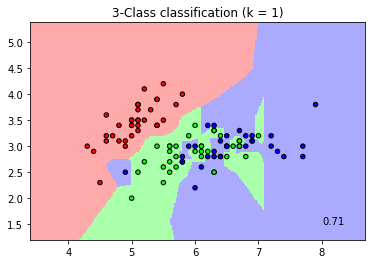

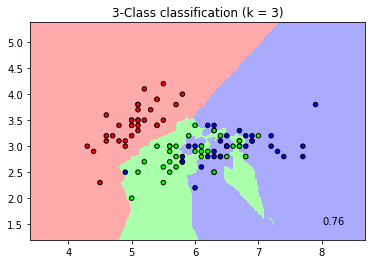

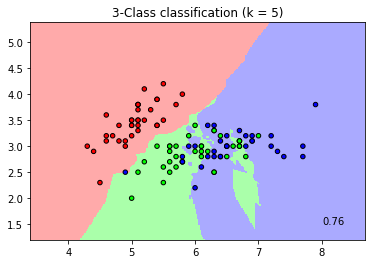

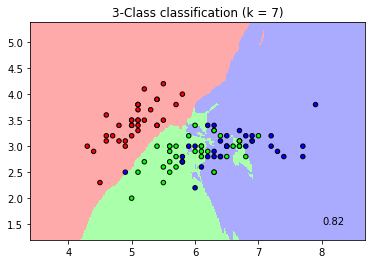

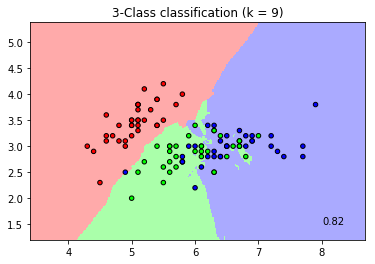

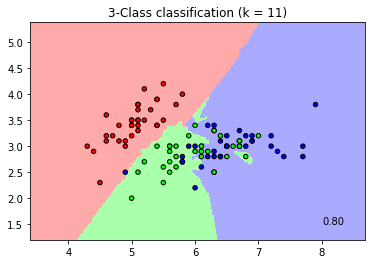

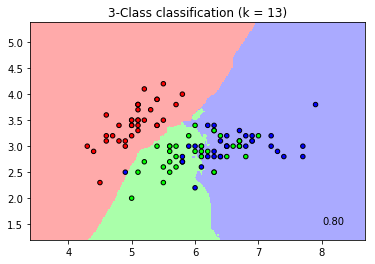

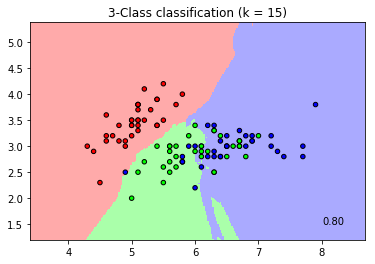

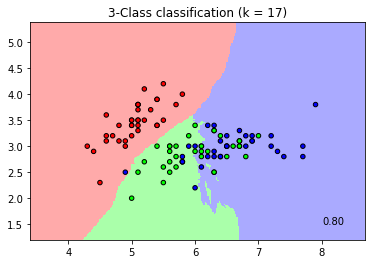

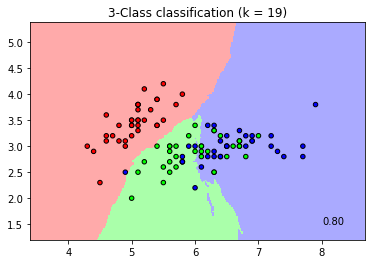

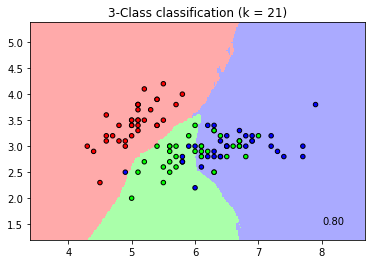

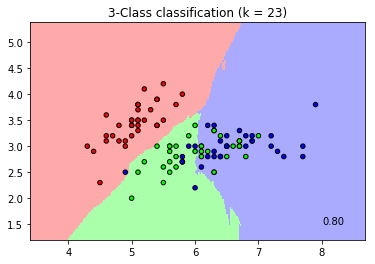

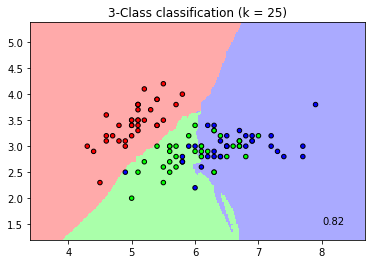

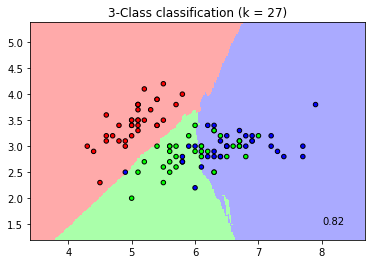

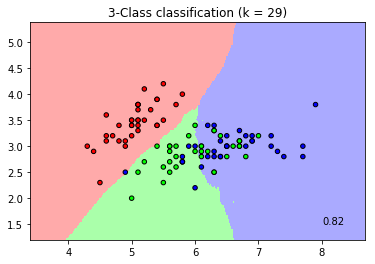

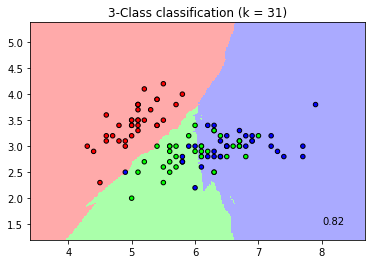

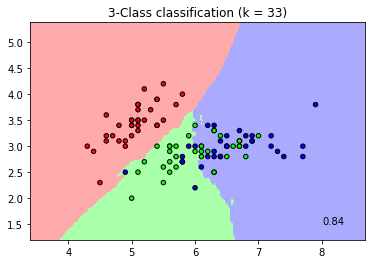

In [16]:
n_neighbors = 35
h = .02  # step size in the mesh
accuracyList = []

for k in range(1, n_neighbors,2):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    pred_test = clf.predict(X_test)
    acc = accuracy(y_test, pred_test)
    #print acc 
    accuracyList.append([acc])
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z= clf.predict(X_test)
    #score= accuracy(y_test, Z)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    
    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (k))
    plt.text(8, 1.5, str('%.2f' % acc))
             
#plt.tight_layout()
plt.show()
#for p in accuracyList : print p 
#print accuracyList

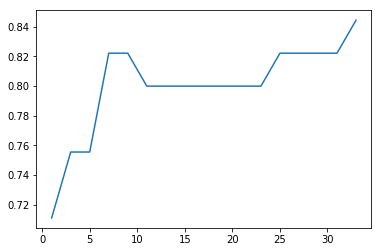

[[0.71111111111111114], [0.75555555555555554], [0.75555555555555554], [0.82222222222222219], [0.82222222222222219], [0.80000000000000004], [0.80000000000000004], [0.80000000000000004], [0.80000000000000004], [0.80000000000000004], [0.80000000000000004], [0.80000000000000004], [0.82222222222222219], [0.82222222222222219], [0.82222222222222219], [0.82222222222222219], [0.84444444444444444]]


In [17]:
#line plot for accuracy and testing
x = [x for x in range(1,35,2)]
y = accuracyList

plt.plot(x,y)
plt.show()
print accuracyList

#Implementation by Hand

In [30]:
#pick k
n_neighbors = 35 # with 3 categories this garentees a majority 
second_accuracyList = []

for k in range(1, n_neighbors,2):
    # iterate through the test set
    
    right = 0
    wrong = 0
    for test_index in range(len(X_test)):
    
        # take the current item in the test set
        x_test_point = X_test[test_index] # we want to find the nearest neighbor to this point
        #print x_test_point
        # initialize list for storing distance and prediction
        storage = []
    
        # iterate through the training points to find the nearest neighbor
        for train_index in range(len(X_train)):
        
            # get x: the input
            x_neighbor = X_train[train_index]
            
            # get y the possible prediction 
            y_neighbor = y_train[train_index]

            # compute distance between the points (what distance did we talk about in class?)
            dist = np.sqrt(np.sum(np.square(x_test_point - X_train[train_index, :])))
        
            #save distance (Why are we saving two things here?)
            # here y_neighbor would be the prediction if x_neighbor is chosen as a close point
            storage.append([dist, y_neighbor]) 
        
        #sort data so closest neighbors are at the top
        storage.sort()
        setosa = 0
        versicolor = 0
        virginica = 0
        
        for row in range (k):
            best_fit = storage[row][1]
            if best_fit == 0:
                setosa += 1
            elif best_fit == 1:
                versicolor += 1
            else:
                virginica += 1
        
        the_fit = 0
        
        if setosa > versicolor and setosa > virginica:
            the_fit = 0
        if setosa < versicolor and versicolor > virginica:
            the_fit = 1
        if virginica > versicolor and setosa < virginica:
            the_fit = 2
            

        if the_fit == y_test[test_index]:
            right += 1
        else:
            wrong += 1

    
    acc = right/ 45.0
    second_accuracyList.append([acc])
    
    
print 
print second_accuracyList


[[0.7111111111111111], [0.7555555555555555], [0.7555555555555555], [0.8444444444444444], [0.7333333333333333], [0.7777777777777778], [0.7555555555555555], [0.7111111111111111], [0.7111111111111111], [0.7111111111111111], [0.7333333333333333], [0.7777777777777778], [0.7777777777777778], [0.8], [0.8], [0.8], [0.8]]


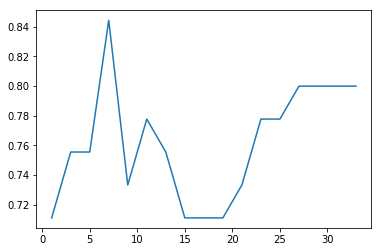

In [31]:
#line plot for accuracy and testing
x = [x for x in range(1,35,2)]
y = second_accuracyList

plt.plot(x,y)
plt.show()

In [20]:
#Comparing the results, we show that using sklearn and the algorithm by hand yield very similar results. 
#They are slightley off, but by approx +-.02
#I would recomend using a K between 5 and 11
#Doing anymore would potentially overfit the training model

#Extra Credit: Cross validation

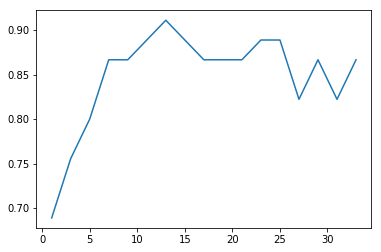

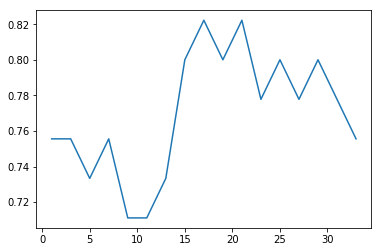

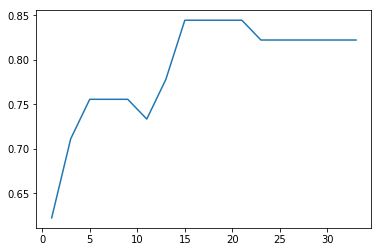

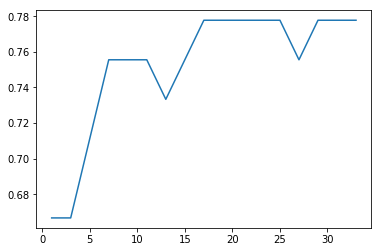

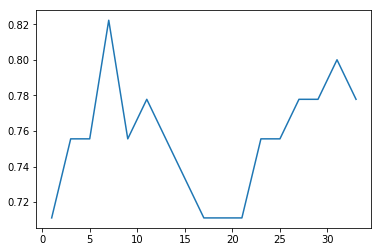

In [24]:
#load data set
iris = datasets.load_iris()
#The data set gives certain lengths of flowers to what flower it is
#The features represent the lengths of the flowers themselves
#The target variable is trying to predict what kind of flower it is
#set x to first two features and y to target values
X = iris.data[:, :2]
Y = iris.target

for fold in range(5):
    # we can split the data using an sklearn function which does everything for us
    test_percent = 0.3 # why am I using .3 here?

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_percent)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    
    n_neighbors = 35
    h = .02  # step size in the mesh
    accuracyList = []

    for k in range(1, n_neighbors,2):
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(k)
        clf.fit(X_train, y_train)
        pred_test = clf.predict(X_test)
        acc = accuracy(y_test, pred_test)
        #print acc 
        accuracyList.append([acc])
        
        #line plot for accuracy and testing
        x = [x for x in range(1,35,2)]
        y = accuracyList

    plt.plot(x,y)
    plt.show()
        #print accuracyList
    

In [29]:
#I worked with Matt, but mostly all was done by myself